Practical No. 8 <br>
Title: Interacting with Web APIs <br>
Name : Tavhare Ruchita Sharad <br>
Roll No : 61 <br>

In [7]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [9]:
# API details
api_key = 'c15c676d2f9d0dada63d7fa10c76ce01'
location = 'India'
url = f'http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}&units=metric'

In [11]:
# Fetch data
response = requests.get(url)
data = response.json()

if response.status_code == 200:
    print("Data retrieved successfully for India")
else:
    print(f"Error: {data.get('message', 'Failed to retrieve data')}")
data

Data retrieved successfully for India


{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1760238000,
   'main': {'temp': 5.14,
    'feels_like': 5.14,
    'temp_min': 5.14,
    'temp_max': 5.14,
    'pressure': 1028,
    'sea_level': 1028,
    'grnd_level': 825,
    'humidity': 86,
    'temp_kf': 0},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 1},
   'wind': {'speed': 0.5, 'deg': 322, 'gust': 0.44},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2025-10-12 03:00:00'},
  {'dt': 1760248800,
   'main': {'temp': 4.88,
    'feels_like': 4.88,
    'temp_min': 4.36,
    'temp_max': 4.88,
    'pressure': 1028,
    'sea_level': 1028,
    'grnd_level': 825,
    'humidity': 83,
    'temp_kf': 0.52},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 1},
   'wind': {'speed': 0.64, 'deg': 300, 'gust': 0.53},
   'visibility': 10000,
   'pop': 0,
   

Step No. 03 - Extract Relevant Weather Attributes.

In [14]:
# Parse weather data
weather_list = data['list']
weather_data = {
    'datetime': [],
    'temperature': [],
    'humidity': [],
    'wind_speed': [],
    'precipitation': []
}
for entry in weather_list:
    weather_data['datetime'].append(datetime.fromtimestamp(entry['dt']))
    weather_data['temperature'].append(entry['main']['temp'])
    weather_data['humidity'].append(entry['main']['humidity'])
    weather_data['wind_speed'].append(entry['wind']['speed'])
    precipitation = entry.get('rain', {}).get('3h', 0)
    weather_data['precipitation'].append(precipitation)

In [16]:
# Convert to DataFrame
df = pd.DataFrame(weather_data)

Step No. 04 - Clean and Preprocess the Data.

In [19]:
print(df.isnull().sum())

datetime         0
temperature      0
humidity         0
wind_speed       0
precipitation    0
dtype: int64


Step No. 05 - Perform Data Modelling.

In [22]:
avg_temp = df['temperature'].mean()
avg_temp

9.1965

In [24]:
max_temp = df['temperature'].max()
max_temp

17.52

In [26]:
min_temp = df['temperature'].min()
min_temp

3.87

Step no. 06 - Visualize the Weather Data.

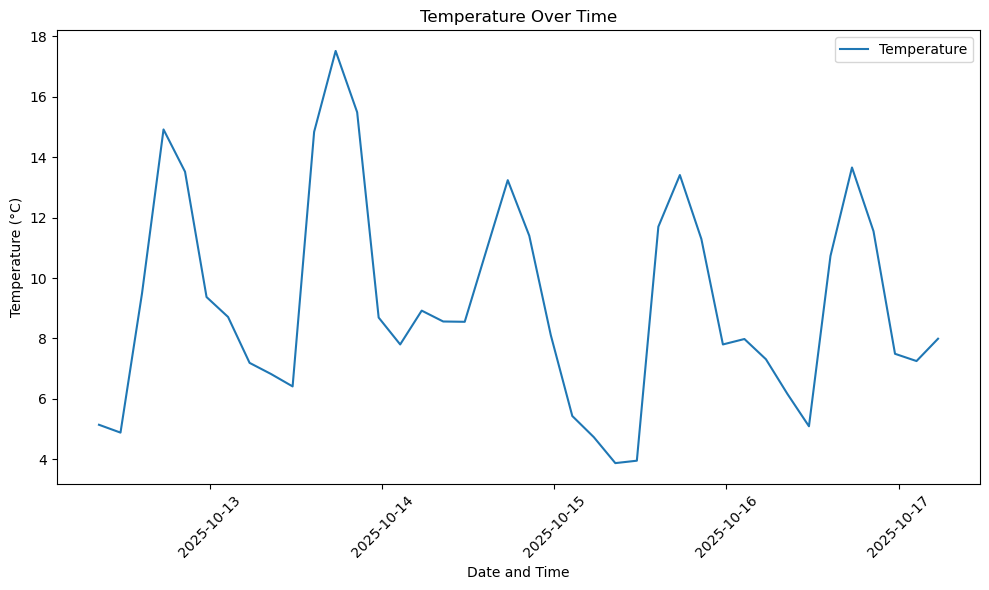

In [29]:
# 1. Line Chart: Temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temperature'], label='Temperature')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

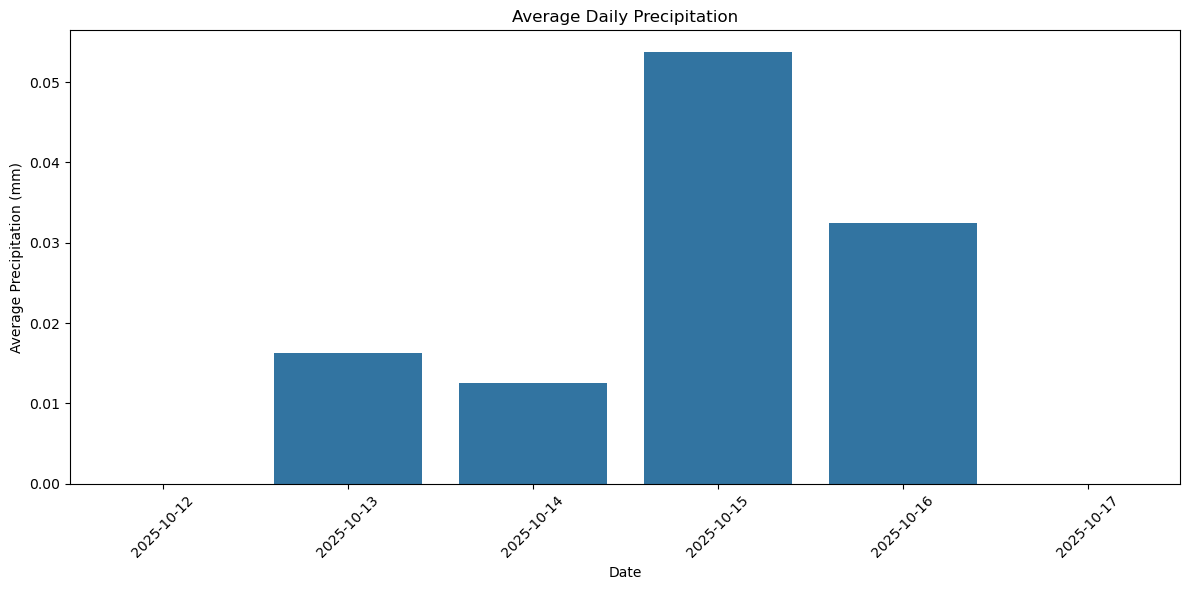

In [31]:
# 2. Bar Plot: Daily average precipitation
df['date'] = df['datetime'].dt.date
daily_precipitation = df.groupby('date')['precipitation'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=daily_precipitation, x='date', y='precipitation')
plt.xlabel('Date')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Daily Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

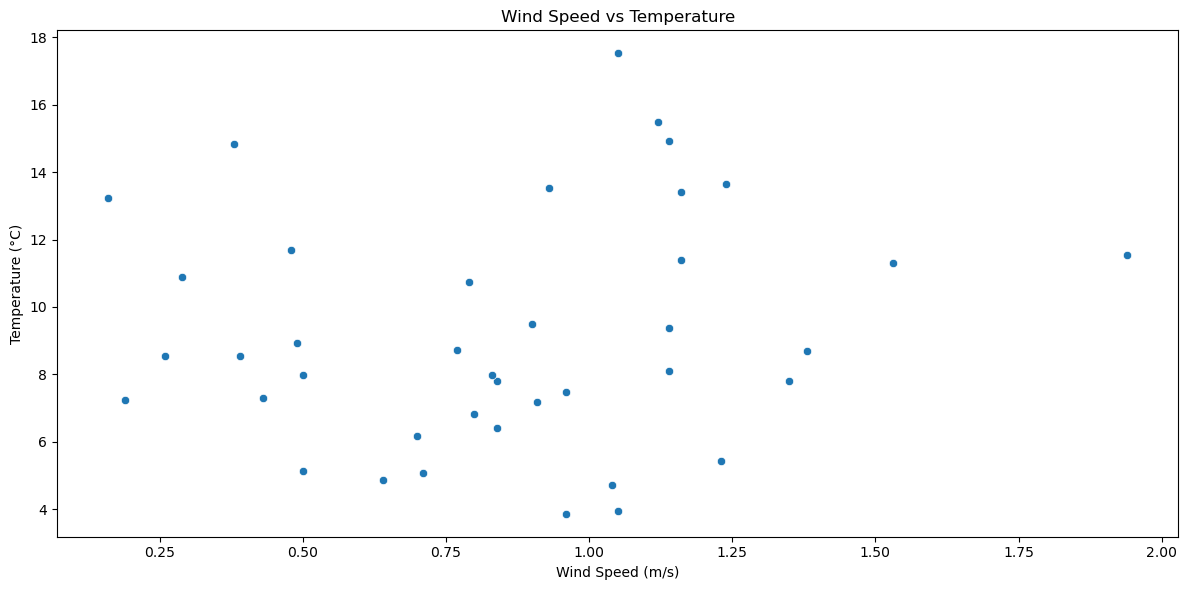

In [33]:
# 3. Scatter Plot: Wind Speed vs Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='wind_speed', y='temperature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Temperature (°C)')
plt.title('Wind Speed vs Temperature')
plt.tight_layout()
plt.show()

Step No. 07 - Apply Data Aggregation Techniques.

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Resample to daily frequency
daily_weather = df.resample('D').agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'max'
})

# Display the result
print(daily_weather.head())

            temperature   humidity  wind_speed
datetime                                      
2025-10-12     9.553333  65.666667        1.14
2025-10-13    10.708750  61.375000        1.38
2025-10-14     9.685000  76.625000        1.16
2025-10-15     7.772500  78.125000        1.53
2025-10-16     8.746250  79.500000        1.94


In [38]:
# 2. Monthly Aggregation.
monthly_weather = df.resample('ME').agg({'temperature': 'mean', 'humidity': 'mean','wind_speed': 'max'})
monthly_weather.head()

,temperature,humidity,wind_speed
datetime,,,
2025-10-31,9.1965,73.15,1.94


In [40]:
# 3. Seasnoal Aggregation.
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['season'] = df.index.month.map(get_season)
seasonal_weather = df.groupby('season').agg({'temperature': 'mean', 'humidity': 'mean','wind_speed': 'max'})
seasonal_weather

,temperature,humidity,wind_speed
season,,,
Autumn,9.1965,73.15,1.94


Step No. 08 - Incorporate Geographical Information.

In [43]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [45]:
# 1. Fetch Weather Data for Multiple Locations.
# Replace 'your_api_key' with your actual API key
api_key = 'c15c676d2f9d0dada63d7fa10c76ce01'
locations = [
    {'name': 'New York', 'lat': 40.7128, 'lon': -74.0060},
    {'name': 'London', 'lat': 51.5074, 'lon': -0.1278},
    {'name': 'Tokyo', 'lat': 35.6895, 'lon': 139.6917},
# Add more locations as needed
]
weather_data = []
for loc in locations:
    url =f'http://api.openweathermap.org/data/2.5/weather?lat={loc["lat"]}&lon={loc["lon"]}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()
    if response.status_code == 200:
        weather_data.append({
            'name': loc['name'],
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'wind_speed': data['wind']['speed'],
            'latitude': loc['lat'],
            'longitude': loc['lon']
        })
    else:
        print(f"Error fetching data for {loc['name']}: {data.get('message', 'Unknown error')}")
weather_data

[{'name': 'New York',
  'temperature': 16.16,
  'humidity': 82,
  'wind_speed': 5.49,
  'latitude': 40.7128,
  'longitude': -74.006},
 {'name': 'London',
  'temperature': 7.93,
  'humidity': 90,
  'wind_speed': 1.16,
  'latitude': 51.5074,
  'longitude': -0.1278},
 {'name': 'Tokyo',
  'temperature': 22.22,
  'humidity': 59,
  'wind_speed': 1.68,
  'latitude': 35.6895,
  'longitude': 139.6917}]

In [264]:
import folium
# 2. Create a Geospatial visualization using Folium.
# Create a map centered at a specific location (e.g., New York)
map_center = [40.7128, -74.0060]
mymap = folium.Map(location=map_center, zoom_start=3)
# Add markers for each location with weather information
for data in weather_data:
    popup_text = f"<b>{data['name']}</b><br>Temperature:{data['temperature']}°C<br>Humidity: {data['humidity']}%<br>Wind Speed:{data['wind_speed']} m/s"
    folium.Marker(location=[data['latitude'], data['longitude']],
popup=popup_text).add_to(mymap)
# Save the map as an HTML file
mymap.save('weather_map.html')
mymap

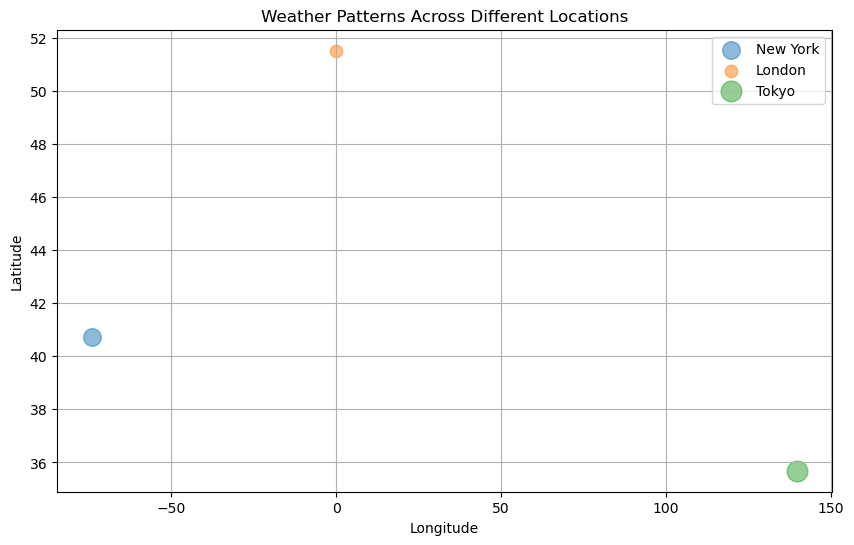

In [47]:
# 3. Viualize Weather Patterns on a Static Map using Matplotlib.
# Plot each location with a scatter plot based on temperature
plt.figure(figsize=(10, 6))
for data in weather_data:
    plt.scatter(data['longitude'],data['latitude'],s=data['temperature']*10,alpha=0.5,
label=data['name'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weather Patterns Across Different Locations')
plt.legend()
plt.grid(True)
plt.show()

Step No. 09 - Explore and Visualize Realationships.

               temperature  humidity  wind_speed  precipitation
temperature       1.000000 -0.719488    0.085031      -0.158885
humidity         -0.719488  1.000000   -0.126451       0.233421
wind_speed        0.085031 -0.126451    1.000000       0.366726
precipitation    -0.158885  0.233421    0.366726       1.000000


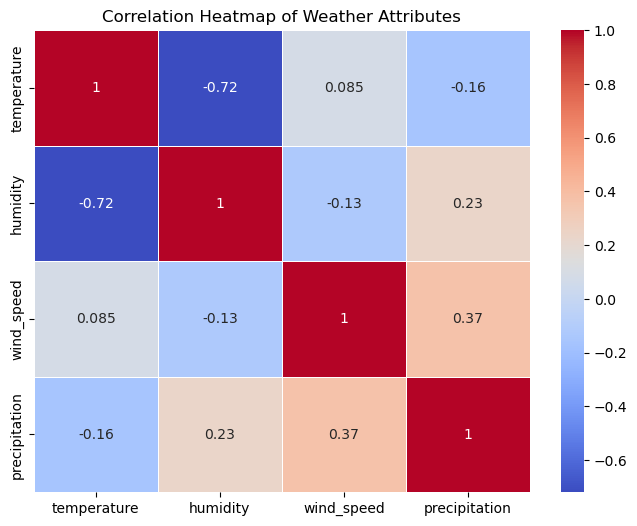

In [269]:
# Calculate correlation matrix
correlation_matrix = df[['temperature', 'humidity', 'wind_speed', 'precipitation']].corr()
print(correlation_matrix)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Attributes')
plt.show()